## API Testing
Only fill out cells containing "input here"  
Make sure API instance is running  
**STOP** API after done

### Command Line version
curl -X 'POST' 'https://qu5qwnx3i7.execute-api.us-west-2.amazonaws.com/model/benchmark' -H 'Content-Type: application/json' -d '{"ticker_list": ["top_100_ticker_l"],"rebal_freq": "D","opt_flag": "max_sharpe","target_risk":0.2,"last_win_only":false}'

### Python

In [2]:
import requests
import json
import pandas as pd
from IPython.display import SVG, display

In [24]:
# input here
# options: check cache record
model_type = 'benchmark' # 'benchmark', 'model'
ticker_list = 'top_100_ticker_l' # 100,200,300
rebal_freq = "D"
opt_flag = "max_sharpe"
target_risk = 0.2 # any float 0.01-0.99, 
last_win_only = False # bool: T/F

In [28]:
output_url = 'https://dsp-public-streamlit.s3.us-west-2.amazonaws.com'
api_url = 'https://qu5qwnx3i7.execute-api.us-west-2.amazonaws.com/'

In [29]:
url = f"{api_url}/model/{model_type}"
print(url)
headers = {
    "Content-Type": "application/json"
}
data = {
    "ticker_list": [ticker_list],
    "rebal_freq": rebal_freq,
    "opt_flag": opt_flag,
    "target_risk": target_risk,
    "last_win_only": last_win_only
}

https://qu5qwnx3i7.execute-api.us-west-2.amazonaws.com//model/benchmark


In [30]:
response = requests.post(url, headers=headers, data=json.dumps(data))

# print the response
print("Status Code:", response.status_code)
print("Response JSON:", response.json())

Status Code: 200
Response JSON: https://dsp-public-streamlit.s3.us-west-2.amazonaws.com/outputs/json/bm_portf_top_100_ticker_l_0.2_False.json


In [32]:
# get link to data and retrieve data
link = response.json()
print(link)

data_json = requests.get(link)

# print the response
print("Status Code:", data_json.status_code)
print("JSON keys:", data_json.json().keys())

https://dsp-public-streamlit.s3.us-west-2.amazonaws.com/outputs/json/bm_portf_top_100_ticker_l_0.2_False.json
Status Code: 200
JSON keys: dict_keys(['portf_rtn_test', 'portf_mkt_rtn_test', 'stats_df_test', 'scaler_df_test', 'scaled_weight_df_test', 'figure_name'])


In [33]:
## input here (options: keys) ##
table = 'scaled_weight_df_test'

In [34]:
# get a table
# create df
data = data_json.json()
df = pd.DataFrame(data[table])

In [35]:
# index to date
df["index"] = pd.to_datetime(df["index"], unit="ms")
df = df.rename({'index':'date'},axis=1)
df.head()

,date,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,...,TXN,UBER,UNH,UNP,V,VRTX,VZ,WFC,WMT,XOM
0,2021-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# desired file type
## input here (options: pkl/svg) ##
filetype = 'svg'

In [37]:
# get figure
fig_name = data['figure_name']
print(fig_name)

fig_link = f'{output_url}/outputs/{fig_name}.{filetype}'
print(fig_link)

fig = requests.get(fig_link)
print(fig.ok) # same as if status_code == 200

benchmark_portf_D_20250405_174803
https://dsp-public-streamlit.s3.us-west-2.amazonaws.com/outputs/benchmark_portf_D_20250405_174803.svg
True


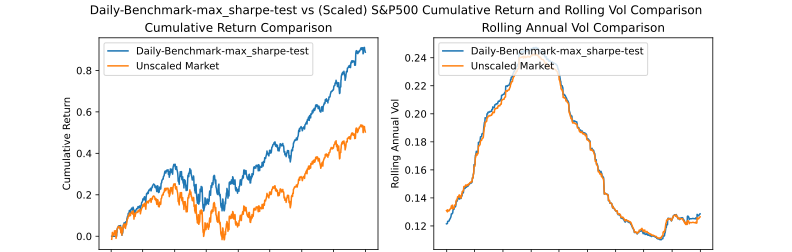

In [38]:
display(SVG(fig.content))